Enter the image path: imgg1.jpg

Image Registration Techniques:
1. Translation
2. Rotation
3. Scaling
4. Shearing
5. Reflection
6. Exit
Enter your choice (1-6): 1
Enter translation along x-axis (positive or negative): 8
Enter translation along y-axis (positive or negative): 9


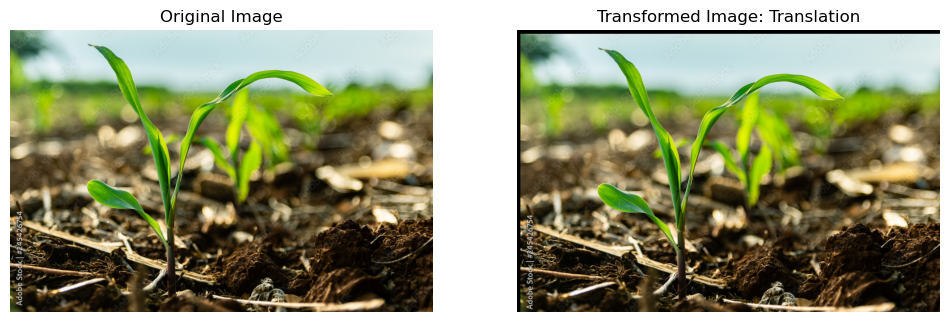


Image Registration Techniques:
1. Translation
2. Rotation
3. Scaling
4. Shearing
5. Reflection
6. Exit
Enter your choice (1-6): 1
Enter translation along x-axis (positive or negative): 9
Enter translation along y-axis (positive or negative): 9


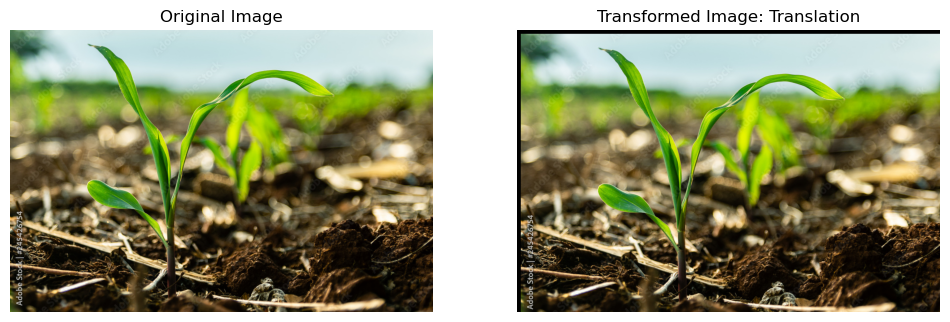


Image Registration Techniques:
1. Translation
2. Rotation
3. Scaling
4. Shearing
5. Reflection
6. Exit
Enter your choice (1-6): 1
Enter translation along x-axis (positive or negative): 15
Enter translation along y-axis (positive or negative): 15


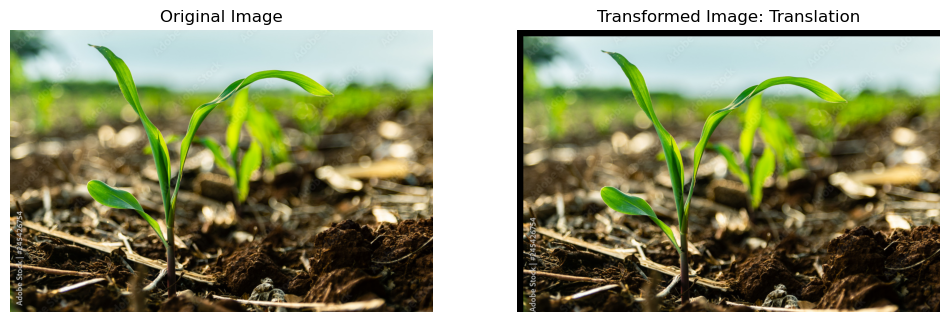


Image Registration Techniques:
1. Translation
2. Rotation
3. Scaling
4. Shearing
5. Reflection
6. Exit
Enter your choice (1-6): 2
Enter rotation angle in degrees: 45
Enter scaling factor (default 1.0): 1.0


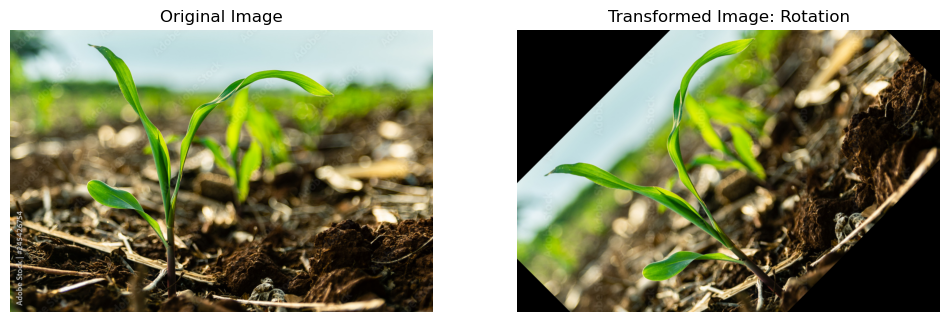


Image Registration Techniques:
1. Translation
2. Rotation
3. Scaling
4. Shearing
5. Reflection
6. Exit
Enter your choice (1-6): 3
Enter scaling factor for x-axis: 6
Enter scaling factor for y-axis: 8


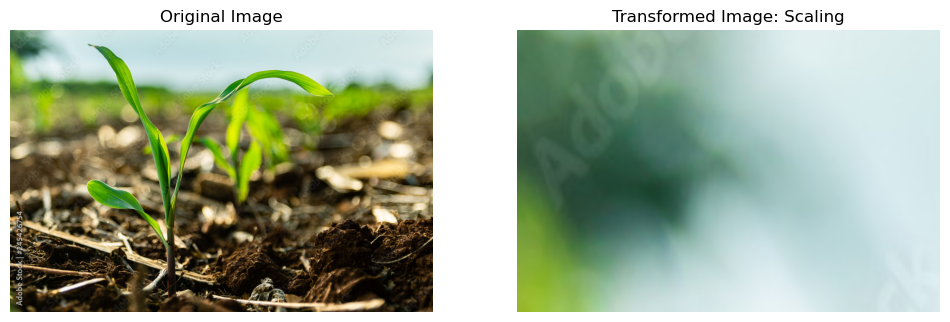


Image Registration Techniques:
1. Translation
2. Rotation
3. Scaling
4. Shearing
5. Reflection
6. Exit
Enter your choice (1-6): 2
Enter rotation angle in degrees: 2
Enter scaling factor (default 1.0): 78


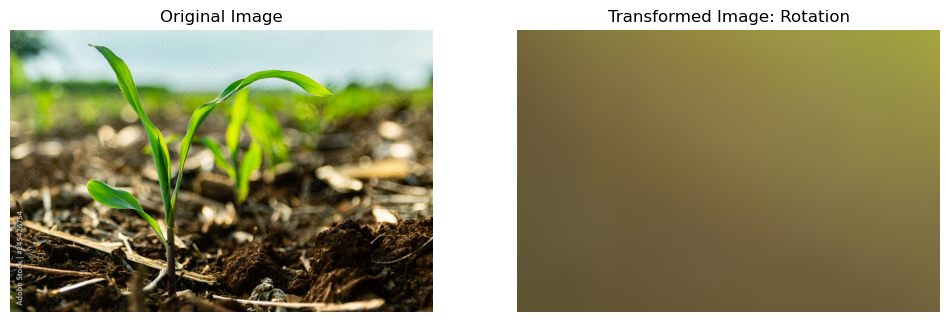


Image Registration Techniques:
1. Translation
2. Rotation
3. Scaling
4. Shearing
5. Reflection
6. Exit
Enter your choice (1-6): 3
Enter scaling factor for x-axis: 2
Enter scaling factor for y-axis: 2


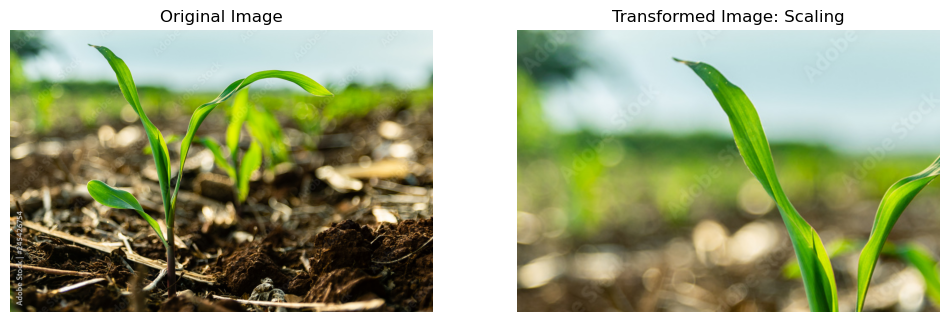


Image Registration Techniques:
1. Translation
2. Rotation
3. Scaling
4. Shearing
5. Reflection
6. Exit
Enter your choice (1-6): 4
Enter shearing factor along x-axis: 3
Enter shearing factor along y-axis: 3


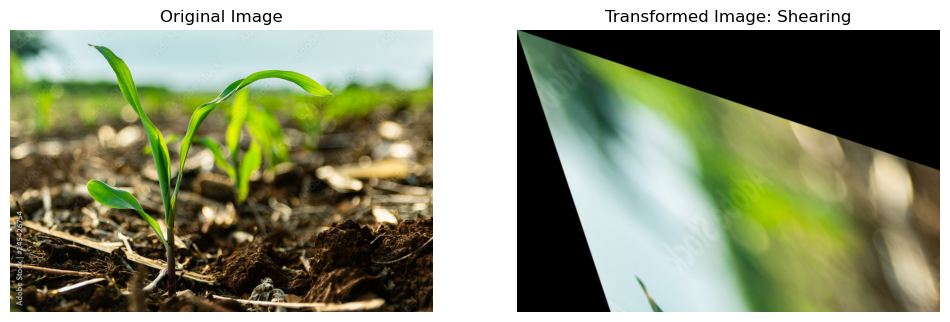


Image Registration Techniques:
1. Translation
2. Rotation
3. Scaling
4. Shearing
5. Reflection
6. Exit
Enter your choice (1-6): 3
Enter scaling factor for x-axis: 6
Enter scaling factor for y-axis: 6


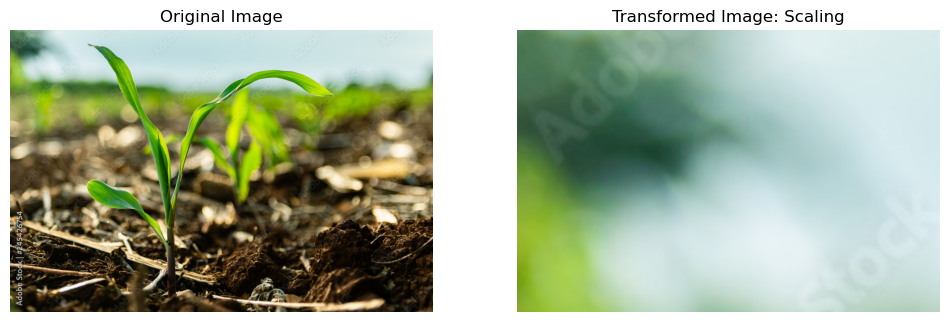


Image Registration Techniques:
1. Translation
2. Rotation
3. Scaling
4. Shearing
5. Reflection
6. Exit
Enter your choice (1-6): 1
Enter translation along x-axis (positive or negative): 1
Enter translation along y-axis (positive or negative): 1


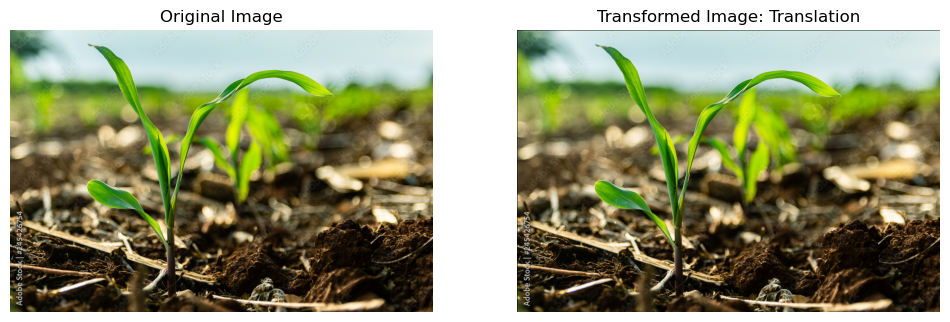


Image Registration Techniques:
1. Translation
2. Rotation
3. Scaling
4. Shearing
5. Reflection
6. Exit
Enter your choice (1-6): 3
Enter scaling factor for x-axis: 1
Enter scaling factor for y-axis: 1


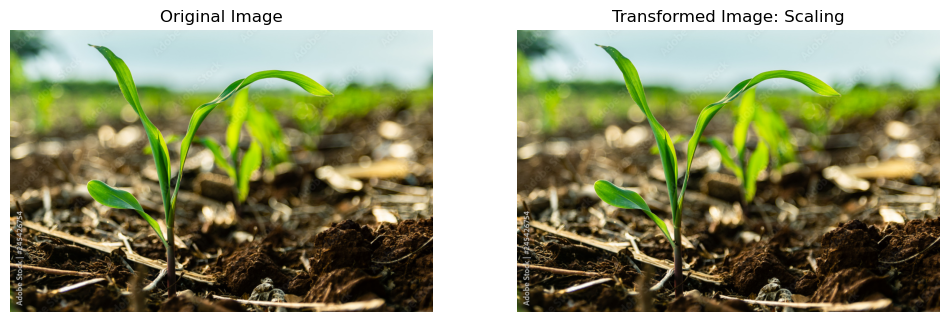


Image Registration Techniques:
1. Translation
2. Rotation
3. Scaling
4. Shearing
5. Reflection
6. Exit
Enter your choice (1-6): 5
Enter reflection axis (0 for x-axis, 1 for y-axis): 0


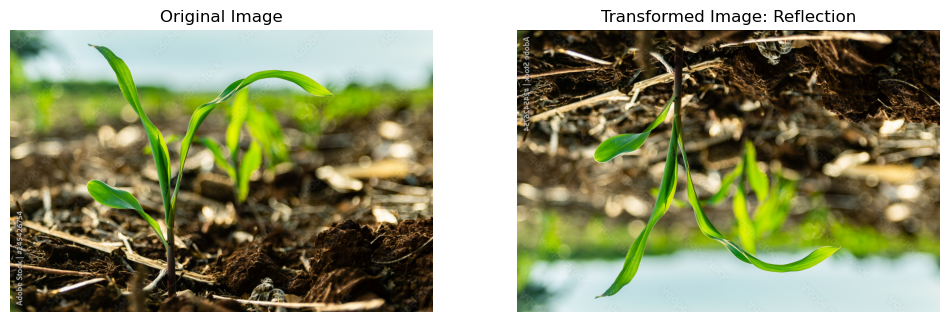


Image Registration Techniques:
1. Translation
2. Rotation
3. Scaling
4. Shearing
5. Reflection
6. Exit
Enter your choice (1-6): 5
Enter reflection axis (0 for x-axis, 1 for y-axis): 1


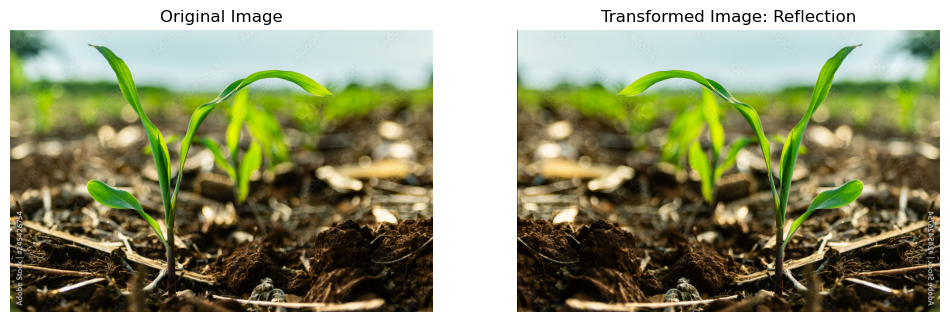


Image Registration Techniques:
1. Translation
2. Rotation
3. Scaling
4. Shearing
5. Reflection
6. Exit


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

class ImageRegistration:
    
    def __init__(self, image):
        self.image = image
        self.rows, self.cols = image.shape[:2]
    
    def translate(self, tx, ty):
        translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
        translated_image = cv2.warpAffine(self.image, translation_matrix, (self.cols, self.rows))
        return translated_image
    
    def rotate(self, angle, scale=1.0):
        center = (self.cols // 2, self.rows // 2)
        rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)
        rotated_image = cv2.warpAffine(self.image, rotation_matrix, (self.cols, self.rows))
        return rotated_image
    
    def scale(self, sx, sy):
        scaling_matrix = np.float32([[sx, 0, 0], [0, sy, 0]])
        scaled_image = cv2.warpAffine(self.image, scaling_matrix, (self.cols, self.rows))
        return scaled_image
    
    def shear(self, shx, shy):
        shearing_matrix = np.float32([[1, shx, 0], [shy, 1, 0]])
        sheared_image = cv2.warpAffine(self.image, shearing_matrix, (self.cols, self.rows))
        return sheared_image
    
    def reflect(self, axis):
        if axis == 0:
            reflection_matrix = np.float32([[1, 0, 0], [0, -1, self.rows]])
        elif axis == 1:
            reflection_matrix = np.float32([[-1, 0, self.cols], [0, 1, 0]])
        else:
            print("Invalid axis. Use 0 for x-axis and 1 for y-axis.")
            return self.image
        reflected_image = cv2.warpAffine(self.image, reflection_matrix, (self.cols, self.rows))
        return reflected_image

    def visualize(self, original, transformed, title):
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')
        plt.axis('off')
        
        plt.subplot(1, 2, 2)
        plt.imshow(cv2.cvtColor(transformed, cv2.COLOR_BGR2RGB))
        plt.title(f'Transformed Image: {title}')
        plt.axis('off')
        
        plt.show()

def menu():
    img_path = input("Enter the image path: ")
    img = cv2.imread(img_path)
    if img is None:
        print("Could not read the image. Please check the path.")
        return
    
    ir = ImageRegistration(img)
    
    while True:
        print("\nImage Registration Techniques:")
        print("1. Translation")
        print("2. Rotation")
        print("3. Scaling")
        print("4. Shearing")
        print("5. Reflection")
        print("6. Exit")
        
        choice = int(input("Enter your choice (1-6): "))
        
        if choice == 1:
            tx = float(input("Enter translation along x-axis (positive or negative): "))
            ty = float(input("Enter translation along y-axis (positive or negative): "))
            translated_image = ir.translate(tx, ty)
            ir.visualize(img, translated_image, "Translation")

        elif choice == 2:
            angle = float(input("Enter rotation angle in degrees: "))
            scale = float(input("Enter scaling factor (default 1.0): ") or "1.0")
            rotated_image = ir.rotate(angle, float(scale))
            ir.visualize(img, rotated_image, "Rotation")

        elif choice == 3:
            sx = float(input("Enter scaling factor for x-axis: "))
            sy = float(input("Enter scaling factor for y-axis: "))
            scaled_image = ir.scale(sx, sy)
            ir.visualize(img, scaled_image, "Scaling")

        elif choice == 4:
            shx = float(input("Enter shearing factor along x-axis: "))
            shy = float(input("Enter shearing factor along y-axis: "))
            sheared_image = ir.shear(shx, shy)
            ir.visualize(img, sheared_image, "Shearing")

        elif choice == 5:
            axis = int(input("Enter reflection axis (0 for x-axis, 1 for y-axis): "))
            reflected_image = ir.reflect(axis)
            ir.visualize(img, reflected_image, "Reflection")

        elif choice == 6:
            print("Exiting the program.")
            break

        else:
            print("Invalid choice. Please select a valid option.")


if __name__ == "__main__":
    menu()
